# **Project: AllLife Credit Card Customer Segmentation**

# **Background:**

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

# **Objective:**

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

# **Key Questions:**

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

# **Data Description:**

- Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

**Steps to follow:**
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split

roundoff = 4

random_state = 42
np.random.seed(random_state)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Format:
pd.options.display.float_format = '{:.4f}'.format

In [2]:
cs = pd.read_excel('Credit Card Customer Data.xlsx')
cs.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
cs.shape

(660, 7)

<b>Observation:</b>
- 660 observations(rows) and 7 variables(features)
- Sl_No and Customer_Key can be dropped as it is not needed for model training
- There is no target variable here. So, we need to build an unsupervised learning model
- Credit limit has higher magnitude compared to other columns. We need to scale the features

In [4]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<b>Observation:</b>
- All columns are in int datatype
- No nulls being observed

In [5]:
cs.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.0000,660.0000,660.0000,660.0000,660.0000,660.0000,660.0000
mean,330.5000,55141.4439,34574.2424,4.7061,2.4030,2.6061,3.5833
std,190.6699,25627.7722,37625.4878,2.1678,1.6318,2.9357,2.8653
min,1.0000,11265.0000,3000.0000,1.0000,0.0000,0.0000,0.0000
25%,165.7500,33825.2500,10000.0000,3.0000,1.0000,1.0000,1.0000
50%,330.5000,53874.5000,18000.0000,5.0000,2.0000,2.0000,3.0000
75%,495.2500,77202.5000,48000.0000,6.0000,4.0000,4.0000,5.0000
max,660.0000,99843.0000,200000.0000,10.0000,5.0000,15.0000,10.0000


<b>Observation:</b>
- Ignore SL_No and Customer Key columns
- "Avg_Credit_Limit" ranges from 3K to 200K with an avg of 34.5K but 50% of customers have less than 18K. So it is heavily right skewed. It has a Std Deviation of 34K
- "Total_Credit_Cards" ranges from 1 to 10 cards with an avg of ~5 and also 50% of customers have less than 5. It has a Std Deviation of ~5
- "Total_visits_bank" ranges from 0 to 5 times with an avg of ~2 and also 50% of customers have less than 2. It has a Std Deviation of ~2
- "Total_visits_online" ranges from 0 to 15 times with an avg of ~3 and also 50% of customers have less than 2. 75% of customers in the dataset have online visits less than 4. So it is heavily right skewed. It has a Std Deviation of ~3
- "Total_calls_made" ranges from 0 to 10 times with an avg of ~4 and also 50% of customers have less than 3. Little bit right skewed. It has a Std Deviation of ~3

</n>##############################################################
<b><p>Here zeros are valid values (ie., customer did not use that specific mode of communication.) and not missing values</p></b>


#### Checking for Missing / Null values

In [6]:
#Checking for NUll or NAs
print(cs.isnull().sum())
print(cs.isna().sum())

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


<b>Observation</b>
- No Null or NA values in the data

#### Checking for duplicates

In [7]:
#Checking for duplicates
cs[cs.duplicated()].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
cs[cs['Customer Key'].duplicated(keep=False)].sort_values('Customer Key',ascending=True)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


<b>Observation</b>
- No duplicates found based on serial number
- But with same customer key there are 5 sets of duplicates but apart of customer key nothing else is same. Other columns have different number. Not sure if these are really duplicates.
- For now not deleting any duplicate rows

### Feature Engineering

In [5]:
#Create a copy of the data
cscopy = cs.copy()
df = cs.copy()

In [6]:
##Drop unwanted columns
df.drop(['Sl_No','Customer Key'], axis=1, inplace=True)

In [7]:
#Checking for duplicates after removing SL_No and Customer Key
cs[cs.duplicated()].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
# Check for unique data in each column:
df.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<b>Observation</b>
- Out of 660 rows of customers:
  - there are 110 distinct abg credit limits
  - There are 10 distinct total credit cards

In [9]:
for i in df.columns:
    print(df[i].value_counts(normalize=True)*100)

8000     5.3030
6000     4.6970
9000     4.2424
13000    4.2424
10000    3.9394
          ...  
25000    0.1515
153000   0.1515
111000   0.1515
112000   0.1515
106000   0.1515
Name: Avg_Credit_Limit, Length: 110, dtype: float64
4    22.8788
6    17.7273
7    15.3030
5    11.2121
2     9.6970
1     8.9394
3     8.0303
10    2.8788
9     1.6667
8     1.6667
Name: Total_Credit_Cards, dtype: float64
2   23.9394
1   16.9697
3   15.1515
0   15.1515
5   14.8485
4   13.9394
Name: Total_visits_bank, dtype: float64
2    28.6364
0    21.8182
1    16.5152
4    10.4545
5     8.1818
3     6.6667
15    1.5152
7     1.0606
12    0.9091
10    0.9091
8     0.9091
13    0.7576
11    0.7576
9     0.6061
14    0.1515
6     0.1515
Name: Total_visits_online, dtype: float64
4    16.3636
0    14.6970
2    13.7879
1    13.6364
3    12.5758
6     5.9091
7     5.3030
9     4.8485
8     4.5455
5     4.3939
10    3.9394
Name: Total_calls_made, dtype: float64


<b>Observation</b>
- more number of customers below 10K avg credit limit
- 22% of customers have 4 credit cards and ~3% with 10 credit cards
- 24% of customer visited bank twice and 15% of customers never visited bank. 85% visited atleast once
- ~22% of customer never did online banking. 78% of customers visited online banking atleast once
- ~15% of customers never called bank. 85% of customers called atleast once

### Analyzing customers using different modes of communication

In [10]:
## ONLY ONLINE
print(df[(df['Total_calls_made']==0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']!=0)].count())
df[(df['Total_calls_made']==0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']!=0)]

Avg_Credit_Limit       7
Total_Credit_Cards     7
Total_visits_bank      7
Total_visits_online    7
Total_calls_made       7
dtype: int64


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
617,136000,8,0,13,0
619,158000,7,0,13,0
623,166000,10,0,7,0
624,178000,7,0,11,0
630,200000,10,0,13,0
631,195000,8,0,15,0
645,171000,10,0,15,0


<b>Observation</b>
- 7 customers who never contacted bank through calls and visited bank but used only online
- These customer have more number of credit cards and more online visits

In [15]:
## ONLY VISITS
print(df[(df['Total_calls_made']==0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)].count())
# df[(df['Total_calls_made']==0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)]

Avg_Credit_Limit       30
Total_Credit_Cards     30
Total_visits_bank      30
Total_visits_online    30
Total_calls_made       30
dtype: int64


<b>Observation</b>
- 30 customers who never contacted bank through calls and not used online but visited bank
- Need to see the demographics of customers to know why are they not using call or online services and preferring only visiting bank

In [16]:
## ONLY CALLS
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']==0)].count()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<b>Observation</b>
- 0 customers who never used bank or visited online have ever contacted through phone

In [17]:
## NO MODE OF COMMUNICATION
df[(df['Total_calls_made']==0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']==0)].count()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<b>Observation</b>
- 0 customers who never contacted bank via any communication channel

In [18]:
## USED VISITS AND ONLINE BUT NEVER PHONE
df[(df['Total_calls_made']==0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       60
Total_Credit_Cards     60
Total_visits_bank      60
Total_visits_online    60
Total_calls_made       60
dtype: int64

<b>Observation</b>
- 60 customers who never contacted bank through calls but visited bank and used online

In [19]:
## USED CALLS AND ONLINE BUT NEVER VISITED
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']==0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       93
Total_Credit_Cards     93
Total_visits_bank      93
Total_visits_online    93
Total_calls_made       93
dtype: int64

<b>Observation</b>
- 93 customers who never visited bank but contacted through calls and used online

In [20]:
## USED CALLS AND VISITS BUT NOT ONLINE
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']==0)].count()

Avg_Credit_Limit       114
Total_Credit_Cards     114
Total_visits_bank      114
Total_visits_online    114
Total_calls_made       114
dtype: int64

<b>Observation</b>
- 114 customers who never used online but contacted bank through calls and visited bank
- We can target these customers to use online banking services. But we should also need to know the reason behind not using online services. We do not have enough information of age of customers or educational background or even region where they stay (if internet services are available or not)

In [21]:
## USED ALL 3 MODES OF COMMUNICATION
df[(df['Total_calls_made']!=0) & (df['Total_visits_bank']!=0) & (df['Total_visits_online']!=0)].count()

Avg_Credit_Limit       356
Total_Credit_Cards     356
Total_visits_bank      356
Total_visits_online    356
Total_calls_made       356
dtype: int64

<b>Observation</b>
- 356 customers used all 3 banking options (calls / online / visited) which is more than half of our customer database

### Univariate Plots

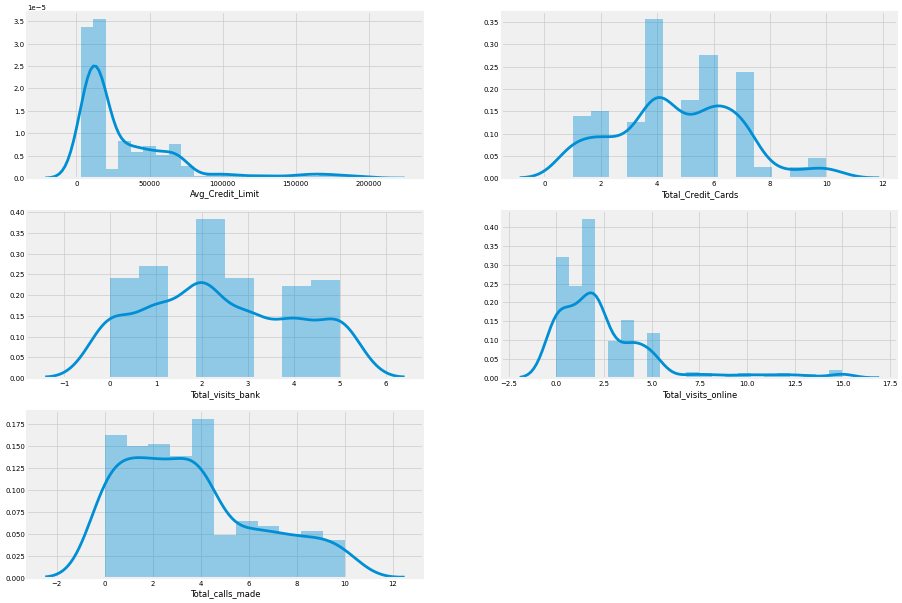

In [22]:
# univariate analysis for continuous variable
numcols = df.columns
fig, ax = plt.subplots(figsize=(20,15), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(3,2,i+1)
    sns.distplot(df[numcols[i]])
    plt.xlabel(numcols[i])

<b>Observation</b>
- Avg Credit limit is heavily right skewed
- more number of customers with lesser avg credit limits (<20K) 
- credit cards, visits online, total calls have multiple peaks
- majority of customers have 4 credit cards
- majority of customers visited bank twice
- majority of customers visited bank online is twice
- majority of customers made <=4 calls to the bank

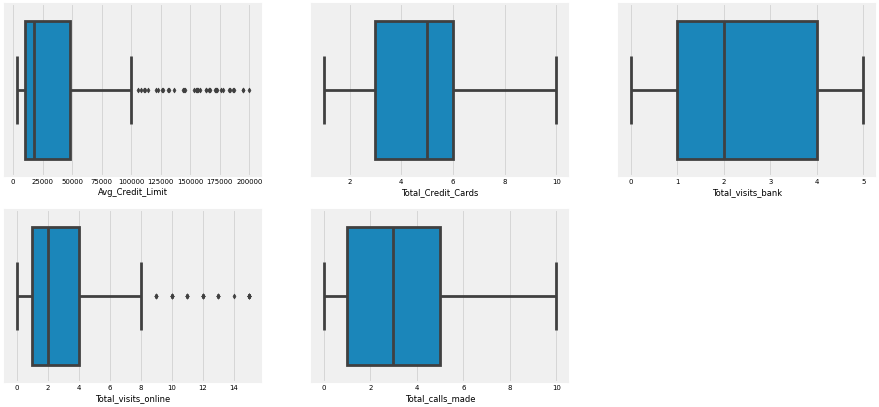

In [23]:
#Box plots
numcols = df.columns
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(numcols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[numcols[i]])
    plt.xlabel(numcols[i])

<b>Observation</b>
- Avg Credit limit has lot of outliers
- visits online also has outliers

In [24]:
df.skew()

Avg_Credit_Limit      2.2024
Total_Credit_Cards    0.1449
Total_visits_bank     0.1419
Total_visits_online   2.2256
Total_calls_made      0.6589
dtype: float64

In [25]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

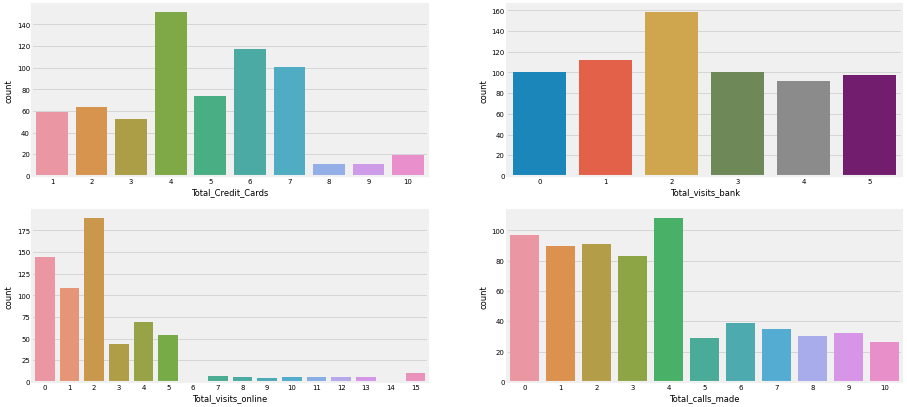

In [26]:
#Count Plots
countscols = ['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']
fig, ax = plt.subplots(figsize=(20,10), dpi=50)
for i in range(0,len(countscols)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[countscols[i]])
    plt.xlabel(countscols[i])


<b>Observation</b>
- Majority of customers have 4 credit cards and then 6 and 7 credit cards. Very few have >=8 cards
- ~160 customers visited bank twice
- majority of customers visited bank online is twice and majority of visits by most of the customers are <=5
- majority of customers made <=4 calls to the bank

In [27]:
## Group by total credit cards and mean of diff. modes of communication
df.groupby('Total_Credit_Cards').mean().iloc[:,1:5]

,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,
1,0.9322,3.4915,7.2203
2,0.9219,3.5312,6.5156
3,0.8679,3.6981,6.6415
4,2.7682,1.7285,3.5298
5,3.2568,1.2162,2.1351
6,3.5556,1.1624,1.9145
7,3.2079,1.5842,2.0990
8,0.6364,9.2727,0.8182
9,0.7273,11.2727,1.2727


<b>Observation</b>
- visits to bank is less for 1-3 credit cards and 8-10 credit cards and is more for customers having 4-7 credit cards
- customers having more number of credit cards (8-10) credit cards are visiting online more compared to less no of cards holding customers
- more calls are from customers having less number of credit cards (1-4)

### Bivariate Plots

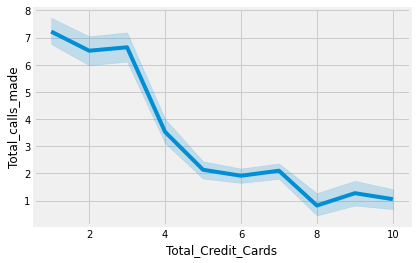

In [28]:
sns.lineplot(df['Total_Credit_Cards'],df['Total_calls_made']);

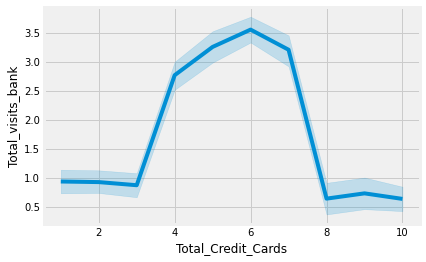

In [29]:
sns.lineplot(df['Total_Credit_Cards'],df['Total_visits_bank']);

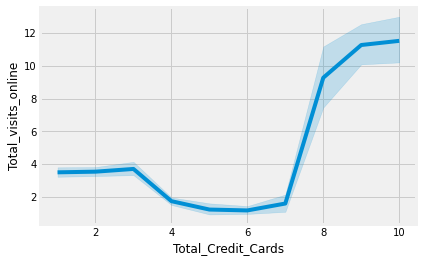

In [30]:
sns.lineplot(df['Total_Credit_Cards'],df['Total_visits_online']);

<b>Observation</b>
- One intresting observation is calls made to bank is reducing as the number of credit cards increased and customers who have less credit cards 1 - 3 are calling bank frequently.
- vists to bank is more for customers having credit cards between 4 to 7
- more visits online for customers having more credit cards 8 to 10

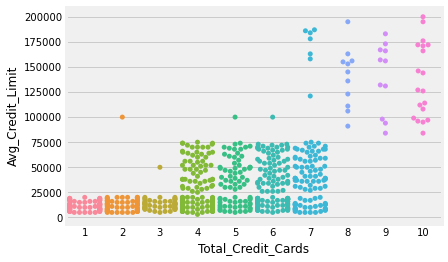

In [31]:
#Range of avg credit limit for each card Vs total credit cards
sns.swarmplot(df['Total_Credit_Cards'],df['Avg_Credit_Limit'])
#EG: For multiple customers having 1 credit card, credit limit ranges from 10K to 25K.... 
#for multiple customers having 10 credit card, credit limit ranges from 100K to 200K....

### Pair Plot

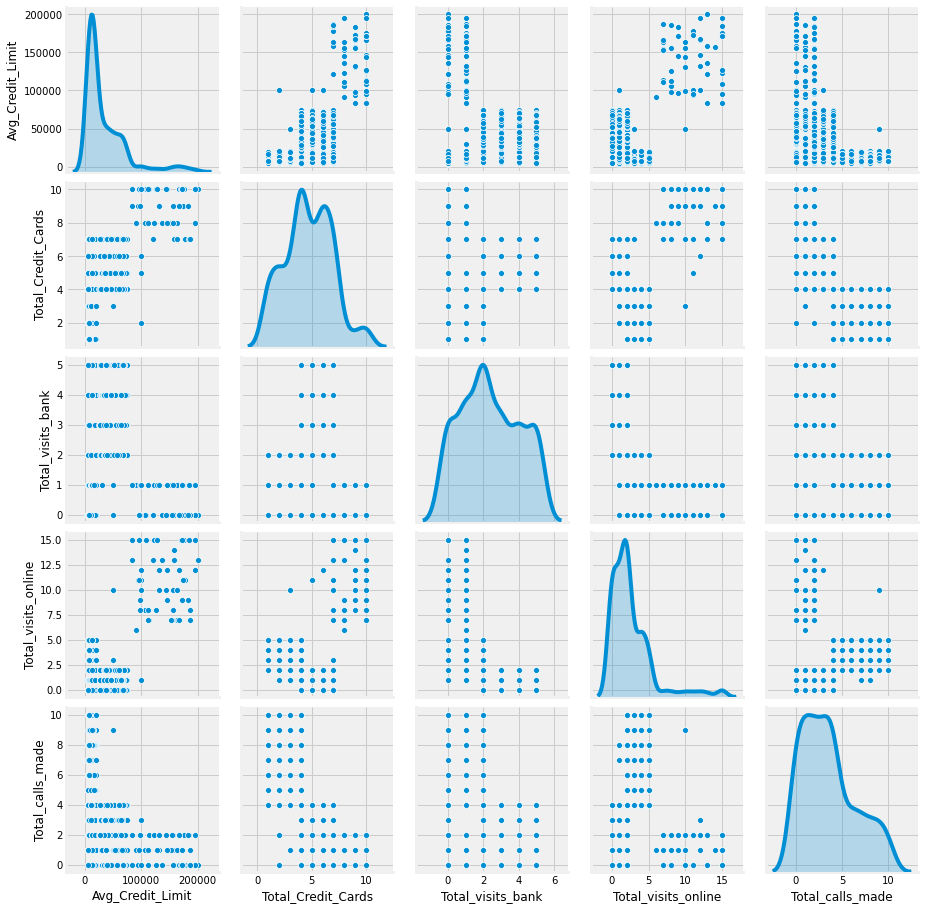

In [32]:
sns.pairplot(df, diag_kind='kde');

<b>Observations</b>

-From diagonal plots:
    - we can see "Visits Online" has 4-6 points (majorly)
    - Calls made - shows 2 peaks majorily
    - visits bank - shows 5 peaks
    - credit cards shows 4 peaks

-From Bivariate plots:
    - we can see 2 clusters between credit limit and credit cards
    - 2 clusters between credit limit and visit online
    - 2 clusters between total visits online and credit cards
    - 3 clusters between total visits online and calls made
    - Credit cards and visit online have +ve relationship
    - Credit limits and visit online have +ve relationship
    - Visit bank and visit online have -ve relationship
    - visit to bank and calls made have -ve relationship
    - kind of -ve relationship between credit limit and calls made; credit limits and visit to bank; credit cards and calls made

#### Applying Transformations to the outlier columns

In [11]:
# df_beforeTransformation = df.copy()
# applyTf = ['Total_visits_online','Total_calls_made','Avg_Credit_Limit']
# for i in applyTf:
#     df[i] = np.log1p(df[i])

In [34]:
# from scipy.stats import rankdata

# df['Avg_Credit_Limit'] = rankdata(df['Avg_Credit_Limit'])

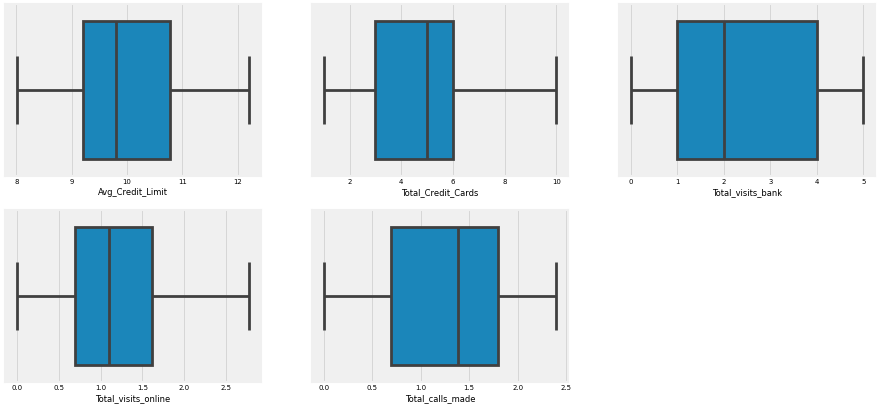

In [12]:
# #Box plots after log1p transformation
# numcols = df.columns
# fig, ax = plt.subplots(figsize=(20,10), dpi=50)
# for i in range(0,len(numcols)):
#     plt.subplot(2,3,i+1)
#     sns.boxplot(df[numcols[i]])
#     plt.xlabel(numcols[i])

<b>Observation</b>
- Now no outliers observed

In [36]:
# # Check the skewness of the data
# df.skew() # Not much skewness observed

#### NOTE: Applying transformations did not improve model performance much. So, commenting transformations. But will perform Normalization.

<b>Correlation plot</b>

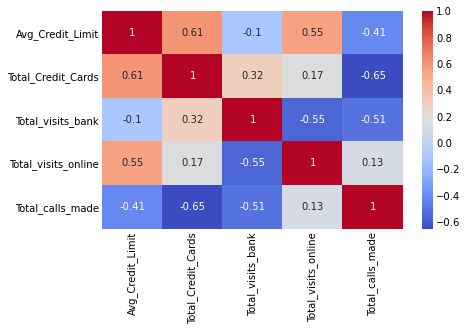

In [37]:
#Corr plot
plt.rcParams["figure.figsize"] = (6,4)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');
plt.show()

<b>observation</b>
- +ve correlation (0.61) between credit limit and no. of cards
- +ve correlation (0.55) between credit limit and visits online
- -ve correlation (-0.41) between credit limit and calls made

- -ve correlation (-0.65) between calls made and total credit cards

- -ve correlation (-0.55) between online visits and bank visits
- -ve correlation (-0.51) between calls made and vists to bank

In [38]:
# df_trf = cscopy.copy()
# df_trf.head()

In [39]:
# df_trf.drop(['Sl_No','Customer Key'],axis=1,inplace=True)
# df_trf['TotalCreditLimit'] = df_trf['Avg_Credit_Limit']*df_trf['Total_Credit_Cards']
# df_trf['total'] = df_trf['Total_visits_bank']+ df_trf['Total_visits_online']+df_trf['Total_calls_made']
# df_trf['bank/total'] = df_trf['Total_visits_bank']/df_trf['total']
# df_trf['online/total'] = df_trf['Total_visits_online']/df_trf['total']
# df_trf['calls/total'] = df_trf['Total_calls_made']/df_trf['total']
# df_trf.drop(['total','Total_visits_bank','Total_visits_online','Total_calls_made','Avg_Credit_Limit','Total_Credit_Cards'],axis=1,inplace=True)
# df_trf.head()

In [40]:
# #Box plots after log1p transformation
# numcols1 = df_trf.columns
# fig, ax = plt.subplots(figsize=(20,10), dpi=50)
# for i in range(0,len(numcols1)):
#     plt.subplot(2,3,i+1)
#     sns.boxplot(df_trf[numcols1[i]])
#     plt.xlabel(numcols1[i])

In [41]:
# applyTf = ['TotalCreditLimit','online/total']
# df_trf['TotalCreditLimit'] = np.log1p(df_trf['TotalCreditLimit'])
# df_trf['online/total'] = np.log1p(np.log1p(np.log1p(np.log1p(df_trf['online/total']))))

In [42]:
# #Box plots after log1p transformation
# numcols1 = df_trf.columns
# fig, ax = plt.subplots(figsize=(20,10), dpi=50)
# for i in range(0,len(numcols1)):
#     plt.subplot(2,3,i+1)
#     sns.boxplot(df_trf[numcols1[i]])
#     plt.xlabel(numcols1[i])

In [43]:
# #Corr plot
# plt.rcParams["figure.figsize"] = (6,4)
# sns.heatmap(df_trf.corr(),annot=True,cmap='coolwarm');
# plt.show()

In [44]:
# from scipy.stats import zscore

# df_trf_beforescaling = df_trf.copy()
# df_trf =df_trf.apply(zscore)

#### Feature Generation

In [13]:
df_beforefeatureextraction = df.copy()
df['TotalCreditLimit'] = df['Avg_Credit_Limit']*df['Total_Credit_Cards']
df.drop(['Total_Credit_Cards','Avg_Credit_Limit'],axis=1,inplace=True)

In [14]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
0,1,0.6931,0.0000,23.0259
1,0,2.3979,2.3026,32.4594
2,1,1.3863,1.6094,75.7386
3,1,0.6931,1.6094,51.5449
4,0,2.5649,1.3863,69.0776


#### Normalize / Scale data using MinMax Scaler

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors, Neural Networks or Distance based algorithms

In [15]:
# from scipy.stats import zscore

df_beforescaling = df.copy()
# df =df.apply(zscore)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.loc[:,:] = scaler.fit_transform(df)

In [16]:
df_final = df.copy()

In [17]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
0,0.2000,0.2500,0.0000,0.1278
1,0.0000,0.8649,0.9603,0.2109
2,0.2000,0.5000,0.6712,0.5920
3,0.2000,0.2500,0.6712,0.3790
4,0.0000,0.9251,0.5781,0.5334


### Model Building

### K-Means Clustering

In [18]:
from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 20,max_iter=300,random_state=random_state,init="k-means++",)
    clusters.fit_predict(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df.sort_values('cluster_errors', ascending=True,inplace=True)
clusters_df[0:15]

,num_clusters,cluster_errors
8,9,29.9835
7,8,33.1839
6,7,37.0753
5,6,41.2351
4,5,45.7276
3,4,56.9137
2,3,74.1846
1,2,113.3513
0,1,205.5967


##### Elbow method to find optimal no. of clusters

Text(0, 0.5, 'Inertia or WCSS')

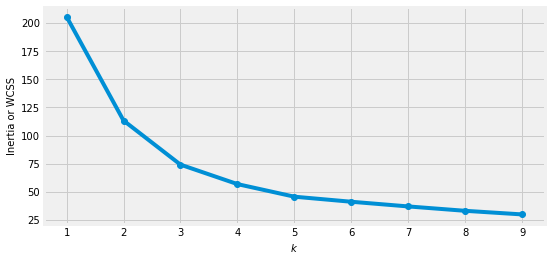

In [19]:
from matplotlib import cm

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Inertia or WCSS", fontsize=10)

<b>Observation</b>
- From the above graph of "Elbow Method", we can find the possible number of clusters. From the graph, we can see the elbow bend at 3.
- we can choose K=3 or K=4
- At k=3 we have an inertia of 50.42 and at K=4 we have 34.23
- Will decide K based on Silhouette score

##### Selecting the number of clusters k using the silhouette score

In [20]:
from sklearn.metrics import silhouette_score


silhouette_score_list = []
kmeans_kwargs = {
    "init": "k-means++",
   "n_init": 20,
   "max_iter": 300,
   "random_state": random_state,}

for k in range(2, 15):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit_predict(df)
   score = silhouette_score(df, kmeans.labels_)
   silhouette_score_list.append(score)

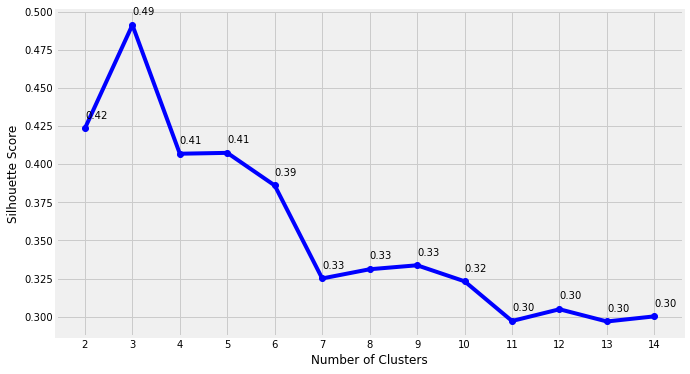

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 15), silhouette_score_list,'bo-')
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
# zip joins x and y coordinates in pairs
for x,y in zip(range(2, 15), silhouette_score_list):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

plt.show()

<b>Observation</b>
- This visualization is much richer than the previous one: although it confirms that k = 3 is a very good choice, it also underlines the fact that k = 4 is not that good, and much better than k = 6,7, 8,9... This was not visible when comparing inertias.
- At K=3, we have a Sil.Score of 0.53.
- We will take K=3

##### Analyzing the silhouette diagrams for various values of k

In [54]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=random_state,n_init=20,max_iter=300).fit(df)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(df, model.labels_)
                     for model in kmeans_per_k[1:]]

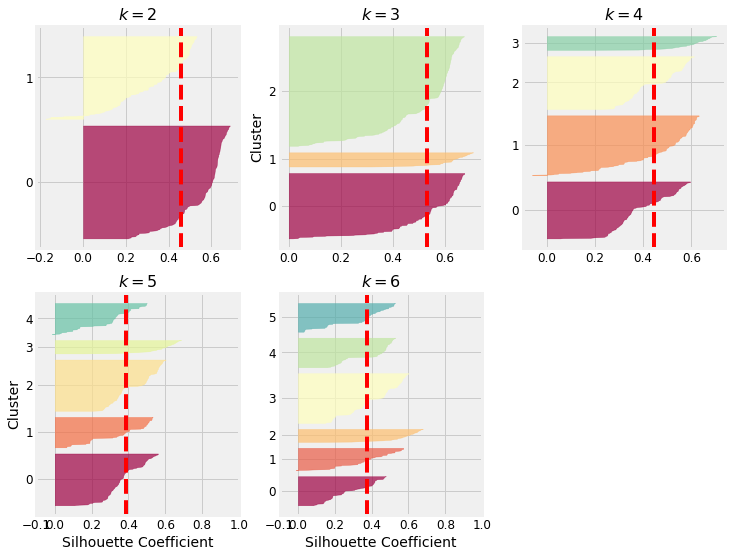

In [55]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(2, 3, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df, y_pred)

    padding = len(df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

<b>Observation</b>
- The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.
- when k = 3, the clusters look  good: most instances extend beyond the dashed line, to the right and closer to 1.0

In [56]:
df = df_final.copy()

In [57]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
0,0.2000,0.0667,0.0000,0.0977
1,0.0000,0.6667,0.9000,0.0727
2,0.2000,0.2000,0.4000,0.1729
3,0.2000,0.0667,0.4000,0.0727
4,0.0000,0.8000,0.3000,0.2982


#### Running KMeans with 3 clusters based on high Silhouette score and optimal low inertia based on Elbow method

In [58]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3,n_init = 500,max_iter=1000,random_state=random_state,init="k-means++")

In [59]:
kmeans.fit(df)
ypred = kmeans.labels_

In [60]:
#3 Cluster centroids that the algorithm found
kmeans.cluster_centers_

array([[0.70209424, 0.06474695, 0.19790576, 0.09106667],
       [0.18859649, 0.23508772, 0.68201754, 0.01359539],
       [0.12      , 0.72666667, 0.108     , 0.61383459]])

In [61]:
Allmodels = pd.DataFrame()
model_name = []
score_value=[]
score_name = []

In [62]:
model_name.append("KMeans_3")
score_name.append("silhouettescore")

In [63]:
score_value.append(round(silhouette_score(df, ypred),roundoff))
silhouette_score(df, ypred)

0.5290838250582389

<b>Observation</b>
- A silhouette score closer to 1 is better. We got around 0.53 which is not bad

In [64]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
0,0.2000,0.0667,0.0000,0.0977
1,0.0000,0.6667,0.9000,0.0727
2,0.2000,0.2000,0.4000,0.1729
3,0.2000,0.0667,0.4000,0.0727
4,0.0000,0.8000,0.3000,0.2982


In [65]:
cscopy['KMeans_Cluster'] = ypred
df['KMeans_Cluster'] = ypred
df_beforescaling['KMeans_Cluster'] = ypred
cscopy.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2


In [66]:
cscopy['KMeans_Cluster'].value_counts(normalize=True)*100

0   57.8788
1   34.5455
2    7.5758
Name: KMeans_Cluster, dtype: float64

<b>Observation</b>
- Cluster 2 has ~58% of total customers
- Cluster 1 with ~35% of total customers
- Cluster 0 with ~8% of total customers

In [67]:
df_beforescaling.groupby('KMeans_Cluster').count()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit
KMeans_Cluster,,,,
0,382,382,382,382
1,228,228,228,228
2,50,50,50,50


<b>Observation</b>
- Cluster 2 has 50 customers
- Cluster 1 with 228 customers
- Cluster 0 with 382 customers

In [68]:
cscopy.groupby('KMeans_Cluster').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KMeans_Cluster,,,,,,,
0,420.4110,55001.3639,33863.8743,5.5131,3.5105,0.9712,1.9791
1,118.2851,55032.4298,12416.6667,2.4693,0.9430,3.5263,6.8202
2,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800


<b>Observation</b>
- Cluster 0: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 1: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 2: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

##### Analysis of each cluster using box plot

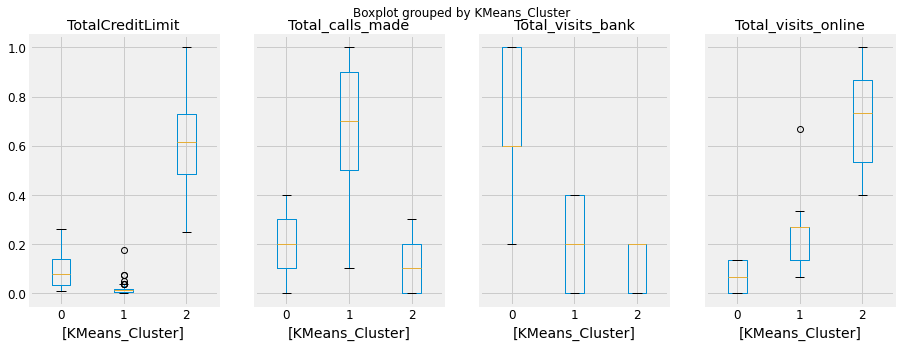

In [69]:
df.boxplot(by='KMeans_Cluster',layout = (1,4),figsize=(15,5));

<b>Cluster Analysis:</b>

- Cluster 0: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits
- Cluster 1: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits
- Cluster 2: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, very less bank visits and highest online visits

##### 3D plot of different clusters on different modes of communication to bank

In [70]:
from mpl_toolkits.mplot3d import Axes3D

In [71]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,KMeans_Cluster
0,0.2000,0.0667,0.0000,0.0977,0
1,0.0000,0.6667,0.9000,0.0727,1
2,0.2000,0.2000,0.4000,0.1729,1
3,0.2000,0.0667,0.4000,0.0727,1
4,0.0000,0.8000,0.3000,0.2982,2


Text(0.5, 0.92, '3D plot of KMeans Clustering')

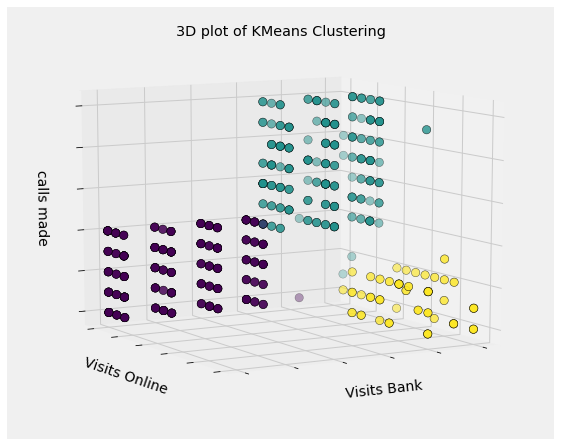

In [72]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=60)
labels = kmeans.labels_
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k',s=70)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Visits Bank')
ax.set_ylabel('Visits Online')
ax.set_zlabel('calls made')
ax.set_title('3D plot of KMeans Clustering')

In [73]:
df = df_final.copy()

In [74]:
df.shape

(660, 4)

### Using PCA to reduce the dimensionality of the dataset

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_red = pca.fit_transform(df)

In [76]:
pca.explained_variance_ratio_

array([0.59968371, 0.28314904, 0.0915035 ])

<b>Observation</b>
- By reducing the original dimensions of 4 to 3, we are able to get 95% of variance explained

In [77]:
pca_df = pd.DataFrame(df_red)

In [78]:
pca_df

,0,1,2
0,-0.0079,0.2525,-0.3935
1,0.8140,0.0040,0.2702
2,0.2513,0.1000,-0.0948
3,0.2131,-0.0173,-0.2071
4,0.5214,0.5727,0.1344
...,...,...,...
655,0.1633,0.7506,0.0921
656,0.3289,0.6779,0.2773
657,0.2009,0.7001,0.1333
658,0.2598,1.1053,0.4142


#### Using KMeans on PCA implemented Dataset

In [79]:
from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 500,max_iter=1000,random_state=random_state,init="k-means++",)
    clusters.fit(pca_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df.sort_values('cluster_errors', ascending=True,inplace=True)
clusters_df[0:15]

,num_clusters,cluster_errors
8,9,14.3271
7,8,15.6632
6,7,18.2587
5,6,20.9988
4,5,24.5820
3,4,30.1827
2,3,46.2921
1,2,84.5683
0,1,163.2645


<b>Observation</b>
- With K=3, cluster error (or clusters Inertia) is reduced from 50.42 (without PCA and with 4 columns) to 46.29 (with PCA and 3 columns)

##### Elbow method to find optimal no. of clusters

Text(0, 0.5, 'Inertia or WCSS')

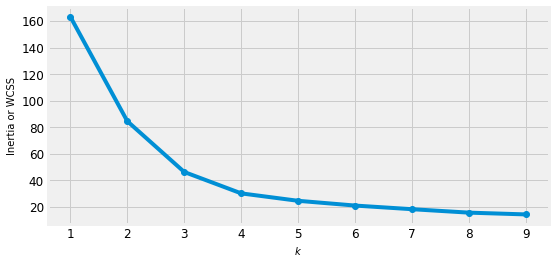

In [80]:
from matplotlib import cm

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Inertia or WCSS", fontsize=10)

<b>Observation</b>
- we can choose K=3 or K=4
- At K=3 we have inertia of cluster errors of 46.29

In [81]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
   "n_init": 100,
   "max_iter": 3000,
   "random_state": random_state,}

for k in range(2, 10):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(pca_df)
   score = silhouette_score(pca_df, kmeans.labels_)
   silhouette_coefficients.append(score)

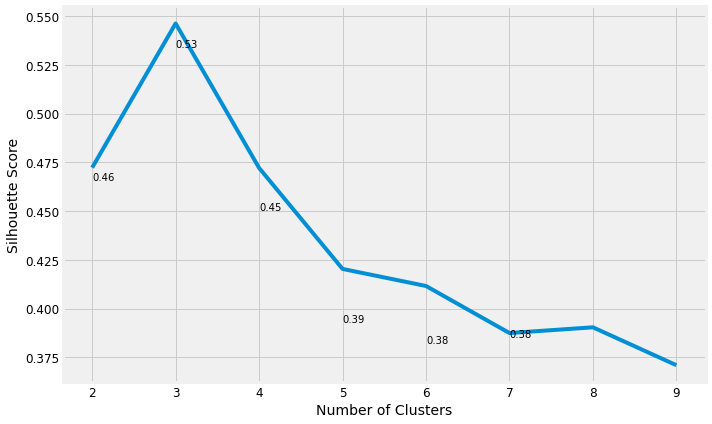

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
# zip joins x and y coordinates in pairs
for x,y in zip(range(2, 10), silhouette_score_list):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.tight_layout()

In [83]:
kmeans = KMeans(n_clusters=3, n_init = 500,max_iter=1000, random_state=random_state)
kmeans.fit(pca_df)
ypred = kmeans.labels_
pca_df['KMeans_Cluster'] = ypred

In [84]:
model_name.append('PCA_KMeans_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(pca_df, kmeans.labels_),roundoff))
silhouette_score(pca_df, kmeans.labels_)

0.7355992330825778

<b>Observation</b>
- With K=3, Silhouette score is increased from 0.53 (without PCA) to 0.73 (with PCA)

In [85]:
pca_df

,0,1,2,KMeans_Cluster
0,-0.0079,0.2525,-0.3935,0
1,0.8140,0.0040,0.2702,1
2,0.2513,0.1000,-0.0948,1
3,0.2131,-0.0173,-0.2071,1
4,0.5214,0.5727,0.1344,2
...,...,...,...,...
655,0.1633,0.7506,0.0921,2
656,0.3289,0.6779,0.2773,2
657,0.2009,0.7001,0.1333,2
658,0.2598,1.1053,0.4142,2


In [86]:
pca_df.groupby('KMeans_Cluster').mean()

,0,1,2
KMeans_Cluster,,,
0,-0.2931,-0.0171,-0.0231
1,0.4245,-0.1460,-0.0004
2,0.3037,0.7962,0.1781


Text(0.5, 0.92, '3D plot of PCA reduced KMeans Clustering')

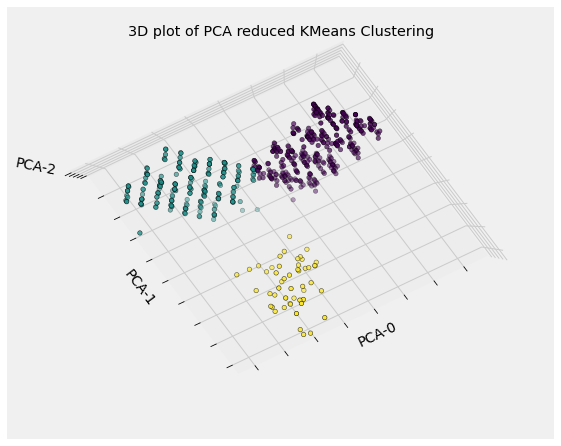

In [87]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=90, azim=60)
k3_model=KMeans(n_clusters=3,n_init = 20,max_iter=300,random_state=random_state,init="k-means++")
k3_model.fit(pca_df)
labels = k3_model.labels_
ax.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], pca_df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k',s=20)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA-0')
ax.set_ylabel('PCA-1')
ax.set_zlabel('PCA-2')
ax.set_title('3D plot of PCA reduced KMeans Clustering')

In [88]:
df = df_final.copy()

### Hierarchical Clustering

#### Agglomerative Clustering

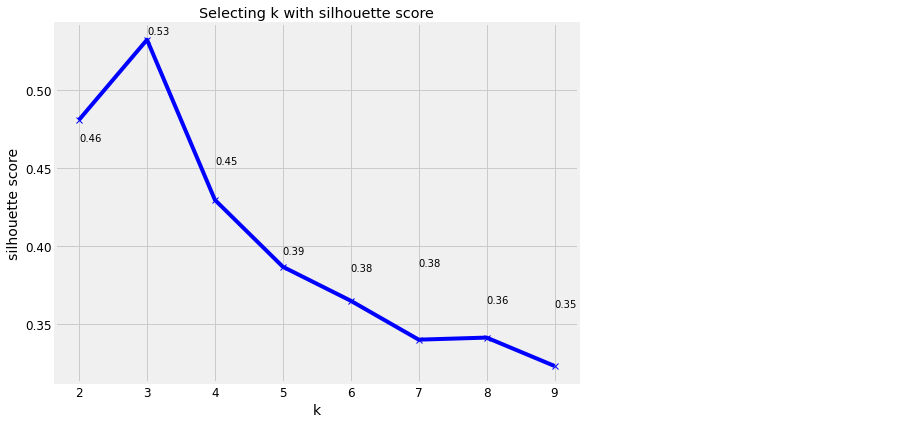

In [89]:
from sklearn.cluster import AgglomerativeClustering 

meanDistortions=[]
#Using Average linkage
for k in range(2, 10):
    model=AgglomerativeClustering(n_clusters=k, affinity='euclidean',  linkage='average')
    model.fit(df)
    prediction=model.labels_
    meanDistortions.append(silhouette_score(df, prediction))

fig = plt.figure(figsize=(18, 6))
plt.plot(range(2, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Selecting k with silhouette score');
# zip joins x and y coordinates in pairs
for x,y in zip(range(2, 15), silhouette_score_list):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.tight_layout()

In [90]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [91]:
model_name.append('AgglomerativeClustering_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5321168992998623

In [92]:
cscopy['agg_cluster'] = Aggmodel.labels_
df['agg_cluster'] = Aggmodel.labels_

In [93]:
cscopy.groupby('agg_cluster').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster
agg_cluster,,,,,,,,
0,115.7248,55004.4128,12394.4954,2.4404,0.8945,3.5688,6.9495,1.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000
2,414.1276,55017.7372,33329.0816,5.4515,3.4719,1.0128,2.0306,0.0255


<b>Observation</b>

- Cluster 0: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 1: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank
- Cluster 2: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank

In [94]:
cscopy.groupby('agg_cluster').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster
agg_cluster,,,,,,,,
0,218,218,218,218,218,218,218,218
1,50,50,50,50,50,50,50,50
2,392,392,392,392,392,392,392,392


<b>Observation</b>
- Here the data is distributed in 3 clusters. 1st cluster (Cluster 0) has 218 data points, 2nd cluster (Cluster 1) has 50 data points and 3rd cluster (cluster 2) has 392 data points.

In [95]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,agg_cluster
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1


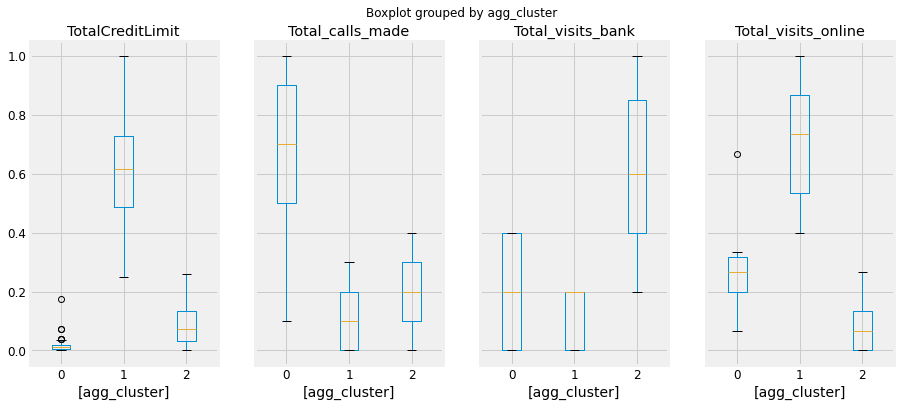

In [96]:
df.boxplot(by='agg_cluster', layout=(1,4), figsize=(15,6));

<b>Observation on Clusters created by Agg CLustering</b>
<p><b>Cluster Analysis:</b></p>

- Cluster 0: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

Text(0.5, 0.92, '3D plot of Agglomerative Clustering')

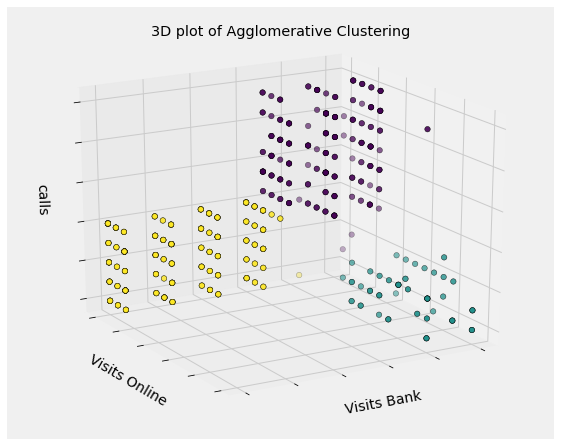

In [97]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = Aggmodel.labels_
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k',s=30)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Visits Bank')
ax.set_ylabel('Visits Online')
ax.set_zlabel('calls')
ax.set_title('3D plot of Agglomerative Clustering')

In [98]:
df = df_final.copy()

##### Agglomerative Clustering using Complete linkage

In [99]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [100]:
model_name.append('Agg_linkage_complete_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.518852969914885

In [101]:
cscopy['Agg_linkage_complete_3'] = Aggmodel.labels_
df['Agg_linkage_complete_3'] = Aggmodel.labels_

In [102]:
cscopy.groupby('Agg_linkage_complete_3').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster
Agg_linkage_complete_3,,,,,,,,,
0,142.4413,55201.3320,14412.9555,2.7368,1.0243,3.2915,6.6032,0.9231,0.2348
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000
2,419.7879,54884.8099,33628.0992,5.4904,3.5895,0.9972,1.8733,0.0000,2.0000


<b>Observation</b>
- Cluster 2: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 0: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 1: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

In [103]:
cscopy.groupby('Agg_linkage_complete_3').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster
Agg_linkage_complete_3,,,,,,,,,
0,247,247,247,247,247,247,247,247,247
1,50,50,50,50,50,50,50,50,50
2,363,363,363,363,363,363,363,363,363


<b>Observation</b>
- Here the data is distributed in 3 clusters. 1st cluster (Cluster 0) has 247 data points, 2nd cluster (Cluster 1) has 50 data points and 3rd cluster (cluster 2) has 363 data points.

In [104]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_complete_3
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1


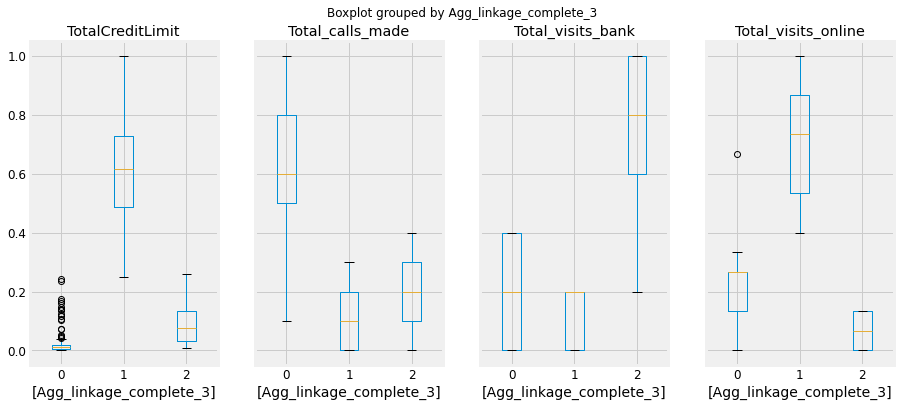

In [105]:
df.boxplot(by='Agg_linkage_complete_3', layout=(1,4), figsize=(15,6));

<b>Observation on Clusters created by Agg Clustering-Complete</b>
<p><b>Cluster Analysis:</b></p>

- Cluster 0: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

In [106]:
df = df_final.copy()

##### Agglomerative Clustering using ward linkage

In [107]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [108]:
model_name.append('Agg_linkage_ward_3')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5290838250582389

In [109]:
cscopy['Agg_linkage_ward_3'] = Aggmodel.labels_
df['Agg_linkage_ward_3'] = Aggmodel.labels_

In [110]:
cscopy.groupby('Agg_linkage_ward_3').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3
Agg_linkage_ward_3,,,,,,,,,,
0,420.4110,55001.3639,33863.8743,5.5131,3.5105,0.9712,1.9791,0,2.0000,1.9005
1,118.2851,55032.4298,12416.6667,2.4693,0.9430,3.5263,6.8202,1,0.0877,0.0000
2,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2,1.0000,1.0000


<b>Observation</b>
- Cluster 0: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 1: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 2: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

In [111]:
cscopy.groupby('Agg_linkage_ward_3').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3
Agg_linkage_ward_3,,,,,,,,,,
0,382,382,382,382,382,382,382,382,382,382
1,228,228,228,228,228,228,228,228,228,228
2,50,50,50,50,50,50,50,50,50,50


<b>Observation</b>
- Here the data is distributed in 3 clusters. 1st cluster (Cluster 0) has 382 data points, 2nd cluster (Cluster 1) has 228 data points and 3rd cluster (cluster 2) has 50 data points.

In [112]:
df.head()

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_ward_3
0,0.2000,0.0667,0.0000,0.0977,0
1,0.0000,0.6667,0.9000,0.0727,1
2,0.2000,0.2000,0.4000,0.1729,1
3,0.2000,0.0667,0.4000,0.0727,1
4,0.0000,0.8000,0.3000,0.2982,2


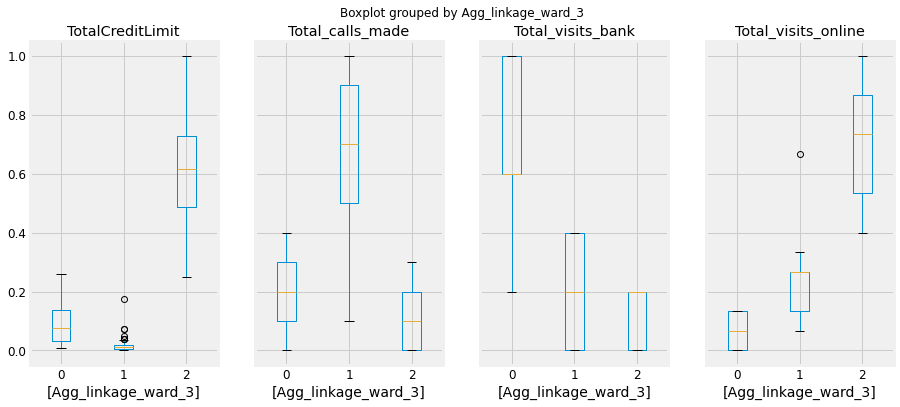

In [113]:
df.boxplot(by='Agg_linkage_ward_3', layout=(1,4), figsize=(15,6));

<p><b>Cluster Analysis:</b></p>

- Cluster 0: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

- Cluster 1: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 2: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

In [114]:
df = df_final.copy()

##### Agglomerative Clustering using l2 and average linkage

In [115]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='l2',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [116]:
model_name.append('Agg_linkage_avg_l2')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5321168992998623

In [117]:
cscopy['Agg_linkage_avg_l2'] = Aggmodel.labels_
df['Agg_linkage_avg_l2'] = Aggmodel.labels_

In [118]:
cscopy.groupby('Agg_linkage_avg_l2').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3
Agg_linkage_avg_l2,,,,,,,,,,,
0,115.7248,55004.4128,12394.4954,2.4404,0.8945,3.5688,6.9495,1.0000,0.0000,0.0000,1.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000
2,414.1276,55017.7372,33329.0816,5.4515,3.4719,1.0128,2.0306,0.0255,2.0000,1.8520,0.0255


<b>Observation</b>
- Cluster 2: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 0: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 1: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

In [119]:
cscopy.groupby('Agg_linkage_avg_l2').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3
Agg_linkage_avg_l2,,,,,,,,,,,
0,218,218,218,218,218,218,218,218,218,218,218
1,50,50,50,50,50,50,50,50,50,50,50
2,392,392,392,392,392,392,392,392,392,392,392


<b>Observation</b>
- Here the data is distributed in 3 clusters. 1st cluster (Cluster 0) has 247 data points, 2nd cluster (Cluster 1) has 50 data points and 3rd cluster (cluster 2) has 363 data points.

In [120]:
df

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_avg_l2
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1
...,...,...,...,...,...
655,0.2000,0.6667,0.0000,0.4937,1
656,0.2000,0.8667,0.2000,0.4185,1
657,0.2000,0.6000,0.1000,0.5789,1
658,0.2000,1.0000,0.0000,0.8596,1


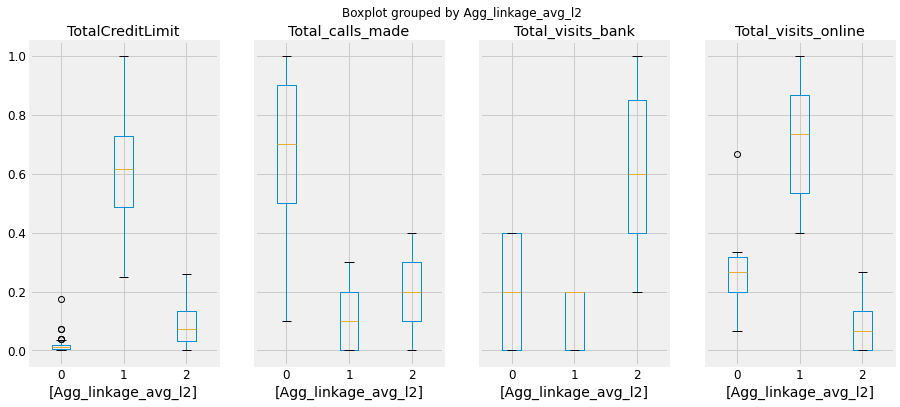

In [121]:
df.boxplot(by='Agg_linkage_avg_l2', layout=(1,4), figsize=(15,6));

<p><b>Cluster Analysis:</b></p>

- Cluster 0: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

In [122]:
df = df_final.copy()

##### Agglomerative Clustering using l1 and average linkage

In [123]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='l1',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [124]:
model_name.append('Agg_linkage_avg_l1')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5311324052072582

In [125]:
cscopy['Agg_linkage_avg_l1'] = Aggmodel.labels_
df['Agg_linkage_avg_l1'] = Aggmodel.labels_

In [126]:
cscopy.groupby('Agg_linkage_avg_l1').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2
Agg_linkage_avg_l1,,,,,,,,,,,,
0,116.7176,54958.7778,12416.6667,2.4398,0.9028,3.5880,7.0000,1.0000,0.0000,0.0000,1.0000,0.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000
2,412.0685,55042.6878,33210.6599,5.4365,3.4543,1.0152,2.0279,0.0305,1.9898,1.8426,0.0305,1.9898


<b>Observation</b>
- Cluster 2: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 0: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 1: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

In [127]:
cscopy.groupby('Agg_linkage_avg_l1').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2
Agg_linkage_avg_l1,,,,,,,,,,,,
0,216,216,216,216,216,216,216,216,216,216,216,216
1,50,50,50,50,50,50,50,50,50,50,50,50
2,394,394,394,394,394,394,394,394,394,394,394,394


<b>Observation</b>
- Here the data is distributed in 3 clusters. 1st cluster (Cluster 0) has 247 data points, 2nd cluster (Cluster 1) has 50 data points and 3rd cluster (cluster 2) has 363 data points.

In [128]:
df

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_avg_l1
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1
...,...,...,...,...,...
655,0.2000,0.6667,0.0000,0.4937,1
656,0.2000,0.8667,0.2000,0.4185,1
657,0.2000,0.6000,0.1000,0.5789,1
658,0.2000,1.0000,0.0000,0.8596,1


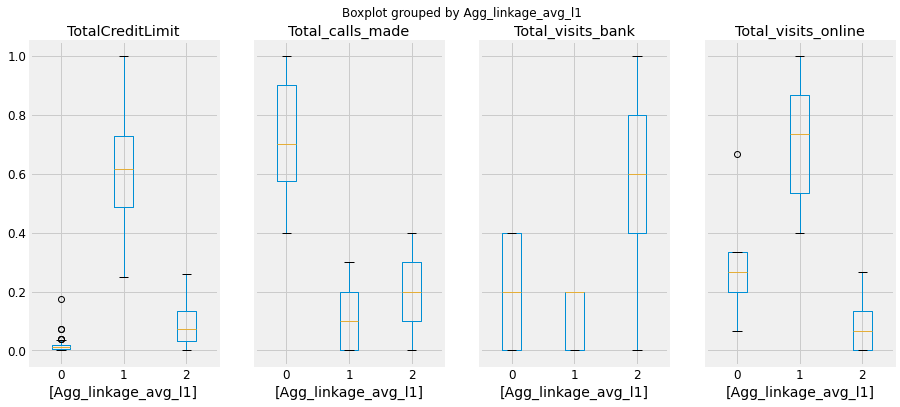

In [129]:
df.boxplot(by='Agg_linkage_avg_l1', layout=(1,4), figsize=(15,6));

<p><b>Cluster Analysis:</b></p>

- Cluster 0: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

In [130]:
df = df_final.copy()

##### Agglomerative Clustering using Manhattan and average linkage

In [131]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='manhattan',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [132]:
model_name.append('Agg_linkage_avg_manhattan')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.5311324052072582

In [133]:
cscopy['Agg_linkage_avg_manhattan'] = Aggmodel.labels_
df['Agg_linkage_avg_manhattan'] = Aggmodel.labels_

In [134]:
cscopy.groupby('Agg_linkage_avg_manhattan').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1
Agg_linkage_avg_manhattan,,,,,,,,,,,,,
0,116.7176,54958.7778,12416.6667,2.4398,0.9028,3.5880,7.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000
2,412.0685,55042.6878,33210.6599,5.4365,3.4543,1.0152,2.0279,0.0305,1.9898,1.8426,0.0305,1.9898,2.0000


<b>Observation</b>
- Cluster 2: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 0: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 1: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

In [135]:
cscopy.groupby('Agg_linkage_avg_manhattan').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1
Agg_linkage_avg_manhattan,,,,,,,,,,,,,
0,216,216,216,216,216,216,216,216,216,216,216,216,216
1,50,50,50,50,50,50,50,50,50,50,50,50,50
2,394,394,394,394,394,394,394,394,394,394,394,394,394


<b>Observation</b>
- Here the data is distributed in 3 clusters. 1st cluster (Cluster 0) has 247 data points, 2nd cluster (Cluster 1) has 50 data points and 3rd cluster (cluster 2) has 363 data points.

In [136]:
df

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_avg_manhattan
0,0.2000,0.0667,0.0000,0.0977,2
1,0.0000,0.6667,0.9000,0.0727,0
2,0.2000,0.2000,0.4000,0.1729,0
3,0.2000,0.0667,0.4000,0.0727,0
4,0.0000,0.8000,0.3000,0.2982,1
...,...,...,...,...,...
655,0.2000,0.6667,0.0000,0.4937,1
656,0.2000,0.8667,0.2000,0.4185,1
657,0.2000,0.6000,0.1000,0.5789,1
658,0.2000,1.0000,0.0000,0.8596,1


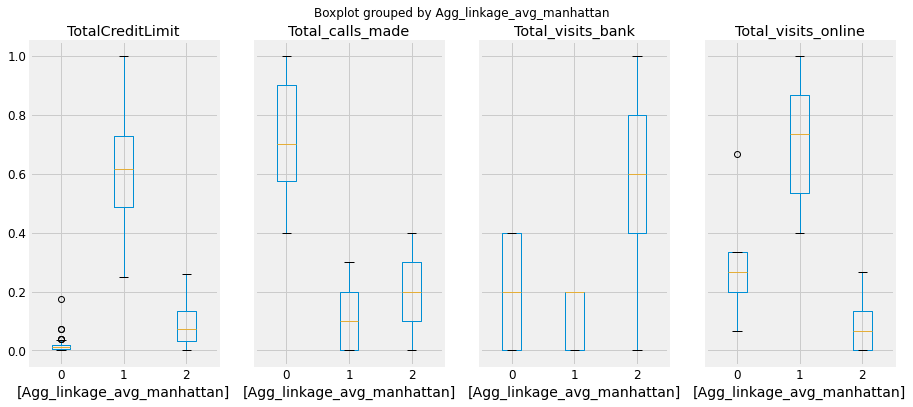

In [137]:
df.boxplot(by='Agg_linkage_avg_manhattan', layout=(1,4), figsize=(15,6));

<p><b>Cluster Analysis:</b></p>

- Cluster 0: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

In [138]:
df = df_final.copy()

##### Agglomerative Clustering using cosine and average linkage

In [139]:
Aggmodel = AgglomerativeClustering(n_clusters=3, affinity='cosine',  linkage='average')
Aggmodel.fit(df)
prediction = Aggmodel.labels_

In [140]:
model_name.append('Agg_linkage_avg_cosine')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, prediction),roundoff))
silhouette_score(df, prediction)

0.531481449513644

In [141]:
cscopy['Agg_linkage_avg_cosine'] = Aggmodel.labels_
df['Agg_linkage_avg_cosine'] = Aggmodel.labels_

In [142]:
cscopy.groupby('Agg_linkage_avg_cosine').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan
Agg_linkage_avg_cosine,,,,,,,,,,,,,,
0,417.0412,55185.0464,33481.9588,5.4768,3.4871,0.9871,2.0103,0.0155,2.0000,1.8711,0.0155,2.0000,2.0000,2.0000
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000
2,116.0090,54712.2387,12504.5045,2.4505,0.9144,3.5676,6.8964,1.0000,0.0360,0.0000,1.0000,0.0360,0.0541,0.0541


<b>Observation</b>
- Cluster 2: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 0: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 1: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

In [143]:
cscopy.groupby('Agg_linkage_avg_cosine').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan
Agg_linkage_avg_cosine,,,,,,,,,,,,,,
0,388,388,388,388,388,388,388,388,388,388,388,388,388,388
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,222,222,222,222,222,222,222,222,222,222,222,222,222,222


<b>Observation</b>
- Here the data is distributed in 3 clusters. 1st cluster (Cluster 0) has 247 data points, 2nd cluster (Cluster 1) has 50 data points and 3rd cluster (cluster 2) has 363 data points.

In [144]:
df

,Total_visits_bank,Total_visits_online,Total_calls_made,TotalCreditLimit,Agg_linkage_avg_cosine
0,0.2000,0.0667,0.0000,0.0977,0
1,0.0000,0.6667,0.9000,0.0727,2
2,0.2000,0.2000,0.4000,0.1729,2
3,0.2000,0.0667,0.4000,0.0727,2
4,0.0000,0.8000,0.3000,0.2982,1
...,...,...,...,...,...
655,0.2000,0.6667,0.0000,0.4937,1
656,0.2000,0.8667,0.2000,0.4185,1
657,0.2000,0.6000,0.1000,0.5789,1
658,0.2000,1.0000,0.0000,0.8596,1


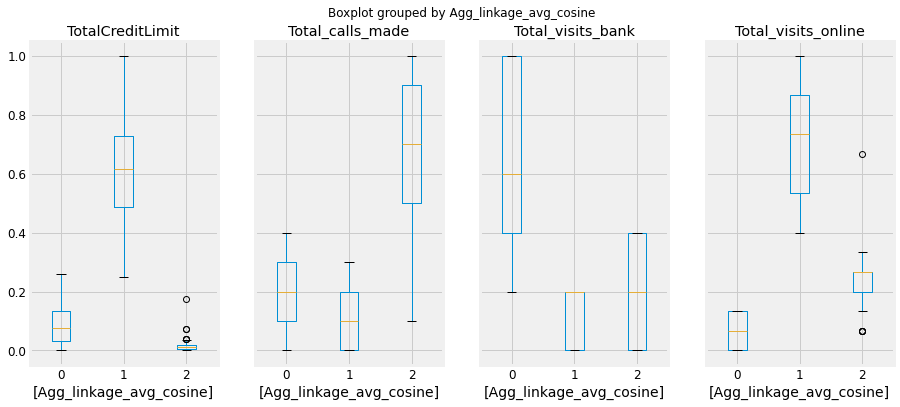

In [145]:
df.boxplot(by='Agg_linkage_avg_cosine', layout=(1,4), figsize=(15,6));

<p><b>Cluster Analysis:</b></p>

- Cluster 0: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

In [146]:
df = df_final.copy()

### Different Linkages using Scipy Cluster

#### Hierachicial clustering with LInkage - Average

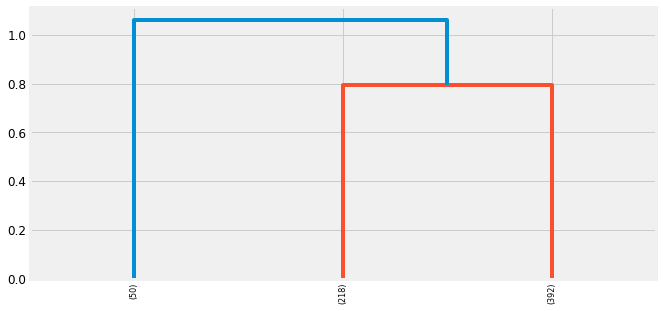

In [147]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

ZAvg = linkage(df, metric='euclidean', method='average',optimal_ordering=True)
# Compute the cophenetic correlation
c, coph_dists = cophenet(ZAvg , pdist(df))
plt.figure(figsize=(10, 5))

dendrogram(ZAvg, p=3, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 0.8,  leaf_font_size=8.)
plt.show()

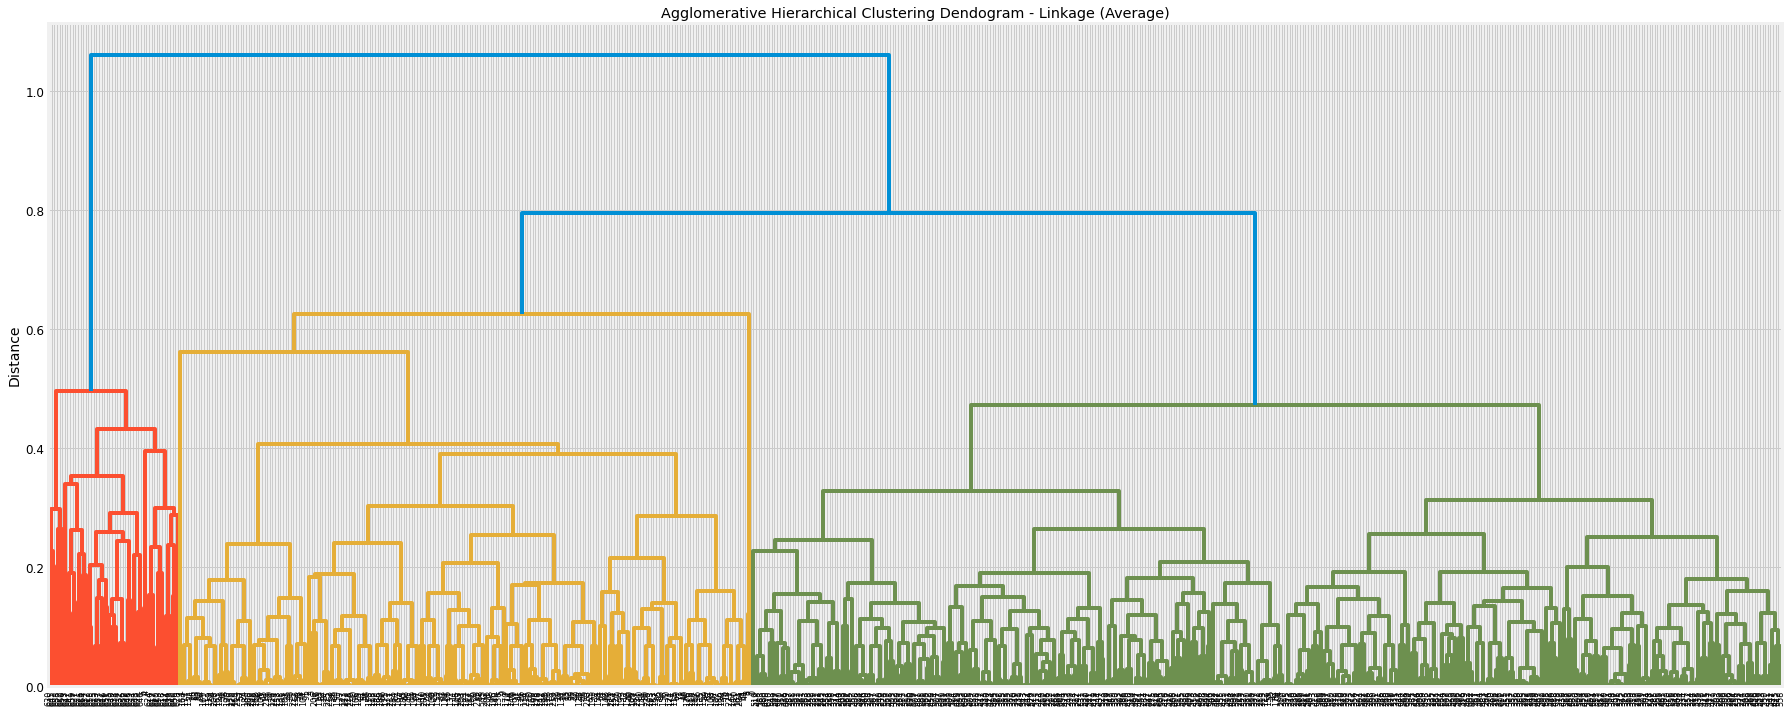

In [148]:
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Linkage (Average)')
plt.ylabel('Distance')
dendrogram(ZAvg, leaf_rotation=90.,color_threshold = 0.7, leaf_font_size=8. )
plt.tight_layout()

In [149]:
#cophenetic correlation
c

0.8284407904470636

<b>Observation</b>
- cophenet corr is a measure of the correlation between the distance of points in feature space and distance on dendrogram
- closer it is to 1, the better is the clustering
- We got CC as 0.82

In [150]:
model_name.append('Linkage_Avg')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

###### Getting the clusters and cluster labels

In [151]:
from scipy.cluster.hierarchy import fcluster
LinkageAvg = fcluster(ZAvg, 0.7, criterion='distance')

In [152]:
LinkageAvg

array([3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [153]:
model_name.append('Linkage_Avg')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, LinkageAvg),roundoff))
silhouette_score(df, LinkageAvg)

0.5321168992998623

In [154]:
cscopy['Linkage_Avg'] = LinkageAvg
df['Linkage_Avg'] = LinkageAvg

In [155]:
cscopy['Linkage_Avg'].value_counts(normalize=True)*100

3   59.3939
2   33.0303
1    7.5758
Name: Linkage_Avg, dtype: float64

<b>Observation</b>
- Cluster 3 has ~59% of total customers
- Cluster 2 with ~33% of total customers
- Cluster 1 with ~8% of total customers

In [156]:
cscopy.groupby('Linkage_Avg').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine
Linkage_Avg,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
3,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392


<b>Observation</b>
- Cluster 1 with 50 customers
- Cluster 2 has 218 customers
- Cluster 3 with 392 customers

In [157]:
cscopy.groupby('Linkage_Avg').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine
Linkage_Avg,,,,,,,,,,,,,,,
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000
2,115.7248,55004.4128,12394.4954,2.4404,0.8945,3.5688,6.9495,1.0000,0.0000,0.0000,1.0000,0.0000,0.0183,0.0183,2.0000
3,414.1276,55017.7372,33329.0816,5.4515,3.4719,1.0128,2.0306,0.0255,2.0000,1.8520,0.0255,2.0000,2.0000,2.0000,0.0204


<b>Observation</b>
- Cluster 1: It includes cutomers with highest avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank
- Cluster 2: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank
- Cluster 3: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank

##### Analysis of each cluster using box plot

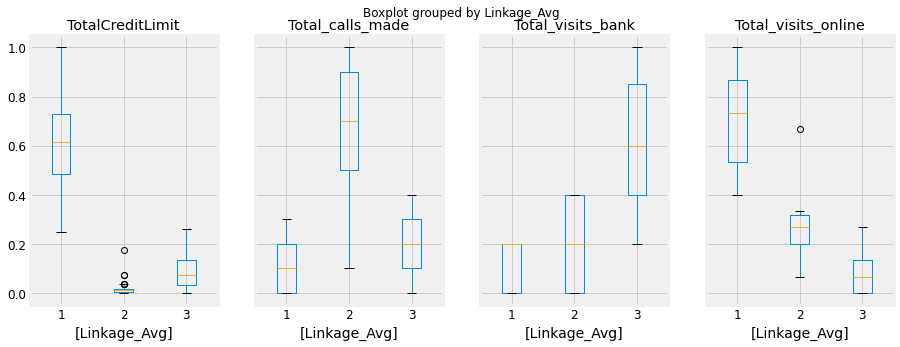

In [158]:
df.boxplot(by='Linkage_Avg',layout = (1,4),figsize=(15,5));

<b>Cluster Analysis:</b>
- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, very less bank visits and highest online visits
- Cluster 2: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits
- Cluster 3: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

Text(0.5, 0.92, '3D plot of Linkage - Average')

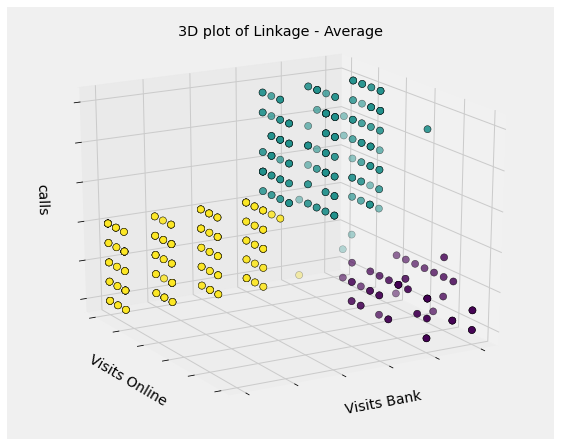

In [159]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = LinkageAvg
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k',s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Visits Bank')
ax.set_ylabel('Visits Online')
ax.set_zlabel('calls')
ax.set_title('3D plot of Linkage - Average')

In [160]:
df = df_final.copy()

#### Linkage - Complete

In [161]:
Zcomp = linkage(df, metric='euclidean', method='complete')
c, coph_dists = cophenet(Zcomp , pdist(df))

c

0.7825424167863714

In [162]:
model_name.append('Linkage_Complete')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

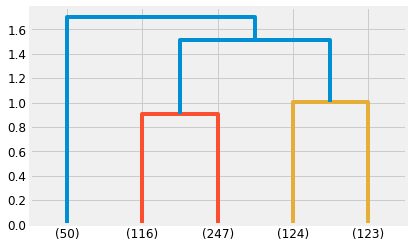

In [163]:
dendrogram(
    Zcomp,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

In [164]:
linkage_Complete = fcluster(Zcomp, 1.4, criterion='distance')

In [165]:
linkage_Complete

array([2, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [166]:
model_name.append('linkage_Complete')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, linkage_Complete),roundoff))
silhouette_score(df, linkage_Complete)

0.518852969914885

In [167]:
cscopy['linkage_Complete'] = linkage_Complete
df['linkage_Complete'] = linkage_Complete

In [168]:
cscopy['linkage_Complete'].value_counts(normalize=True)*100

2   55.0000
3   37.4242
1    7.5758
Name: linkage_Complete, dtype: float64

<b>Observation</b>
- Cluster 2 has ~55% of total customers
- Cluster 3 with ~37% of total customers
- Cluster 1 with ~7% of total customers

In [169]:
cscopy.groupby('linkage_Complete').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg
linkage_Complete,,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363
3,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247


<b>Observation</b>
- Cluster 1 with 50 customers
- Cluster 2 has 363 customers
- Cluster 3 with 247 customers

In [170]:
cscopy.groupby('linkage_Complete').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg
linkage_Complete,,,,,,,,,,,,,,,,
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,419.7879,54884.8099,33628.0992,5.4904,3.5895,0.9972,1.8733,0.0000,2.0000,2.0000,0.0000,2.0000,2.0000,2.0000,0.0000,3.0000
3,142.4413,55201.3320,14412.9555,2.7368,1.0243,3.2915,6.6032,0.9231,0.2348,0.0000,0.9231,0.2348,0.2510,0.2510,1.7976,2.1174


<b>Observation</b>
- Cluster 1: It includes cutomers with highest avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank
- Cluster 2: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 3: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank

##### Analysis of each cluster using box plot

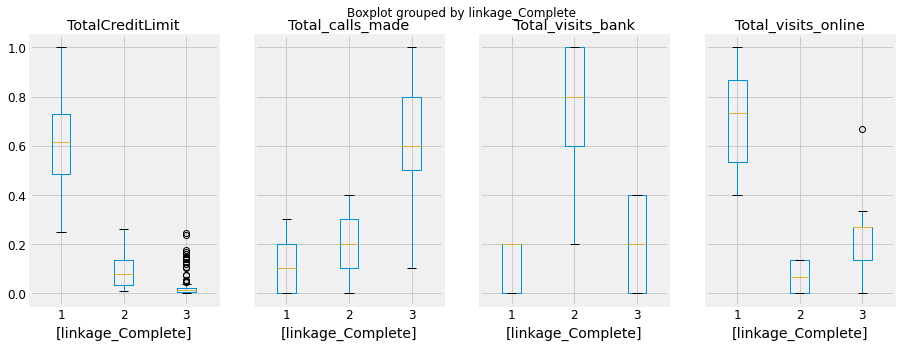

In [171]:
df.boxplot(by='linkage_Complete',layout = (1,4),figsize=(15,5));

<b>Cluster Analysis:</b>
- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, very less bank visits and highest online visits
- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits
- Cluster 3: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

Text(0.5, 0.92, '3D plot of Linkage - Complete')

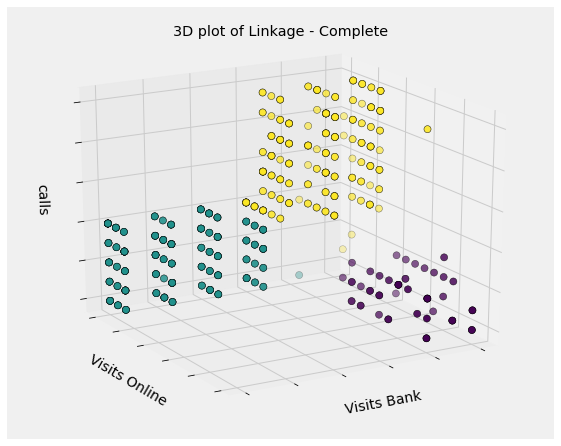

In [172]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = linkage_Complete
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k',s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Visits Bank')
ax.set_ylabel('Visits Online')
ax.set_zlabel('calls')
ax.set_title('3D plot of Linkage - Complete')

In [173]:
df = df_final.copy()

#### Linkage - Ward

In [174]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Zward= linkage(df, metric='euclidean', method='ward')
c, coph_dists = cophenet(Zward , pdist(df))

c

0.7383865792365224

In [175]:
model_name.append('Linkage_Ward')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

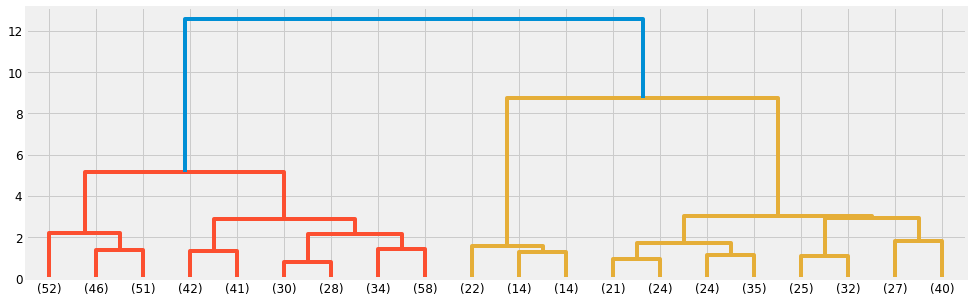

In [176]:
plt.figure(figsize=(15, 5))
dendrogram(
    Zward,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
)
plt.show()

In [177]:
Linkage_Ward = fcluster(Zward, 8, criterion='distance')

In [178]:
Linkage_Ward

array([1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [179]:
model_name.append('Linkage_Ward')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, Linkage_Ward),roundoff))
silhouette_score(df, Linkage_Ward)

0.5290838250582389

In [180]:
cscopy['Linkage_Ward'] = Linkage_Ward
df['Linkage_Ward'] = Linkage_Ward

In [181]:
cscopy['Linkage_Ward'].value_counts(normalize=True)*100

1   57.8788
3   34.5455
2    7.5758
Name: Linkage_Ward, dtype: float64

<b>Observation</b>
- Cluster 3 has ~57% of total customers
- Cluster 1 with ~34% of total customers
- Cluster 2 with ~8% of total customers

In [182]:
cscopy.groupby('Linkage_Ward').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete
Linkage_Ward,,,,,,,,,,,,,,,,,
1,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
3,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228


<b>Observation</b>
- Cluster 1 with 382 customers
- Cluster 2 has 50 customers
- Cluster 3 with 228 customers

In [183]:
cscopy.groupby('Linkage_Ward').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete
Linkage_Ward,,,,,,,,,,,,,,,,,
1,420.4110,55001.3639,33863.8743,5.5131,3.5105,0.9712,1.9791,0.0000,2.0000,1.9005,0.0000,2.0000,2.0000,2.0000,0.0000,3.0000,2.0497
2,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,118.2851,55032.4298,12416.6667,2.4693,0.9430,3.5263,6.8202,1.0000,0.0877,0.0000,1.0000,0.0877,0.1053,0.1053,1.9474,2.0439,3.0000


<b>Observation</b>
- Cluster 1: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 2: It includes cutomers with highest avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank
- Cluster 3: Customers with low credit limit, fewer credit cards,  medium bank visits, medium online visits and highest calls to bank




##### Analysis of each cluster using box plot

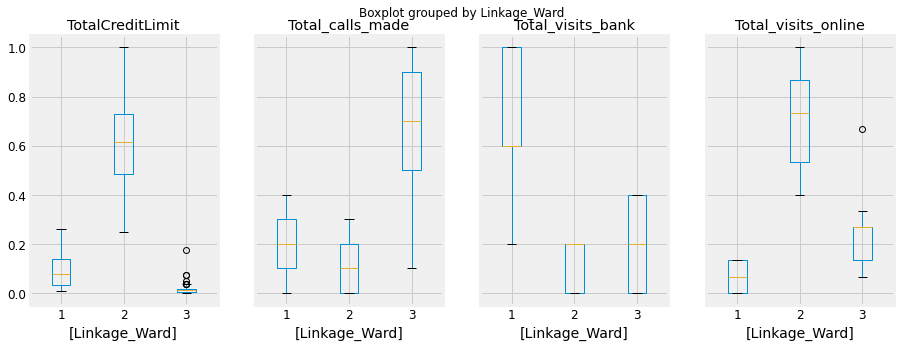

In [184]:
df.boxplot(by='Linkage_Ward',layout = (1,4),figsize=(15,5));

<b>Cluster Analysis:</b>
- Cluster 1: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits
- Cluster 2: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, very less bank visits and highest online visits
- Cluster 3: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

Text(0.5, 0.92, '3D plot of Linkage - Ward')

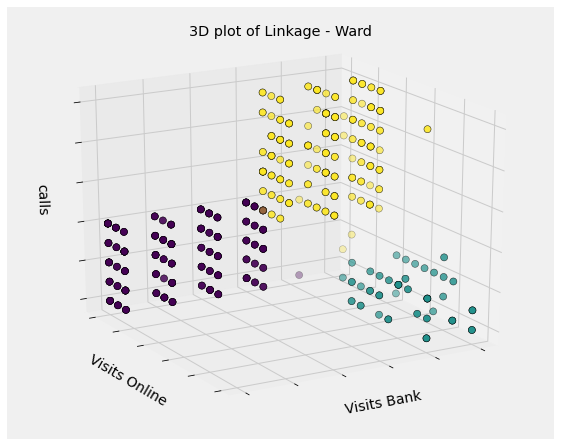

In [185]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = Linkage_Ward
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k',s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Visits Bank')
ax.set_ylabel('Visits Online')
ax.set_zlabel('calls')
ax.set_title('3D plot of Linkage - Ward')

In [186]:
df = df_final.copy()

#### Linkage - Single

In [187]:
Zcomp = linkage(df, metric='euclidean', method='single')
c, coph_dists = cophenet(Zcomp , pdist(df))

c

0.6344644872664308

In [188]:
model_name.append('Linkage_single')
score_name.append("cophenetic correlation")
score_value.append(round(c,roundoff))

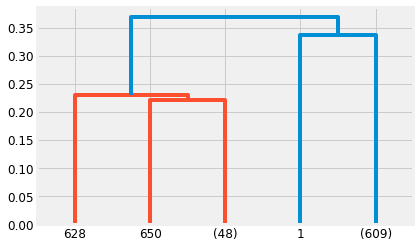

In [189]:
dendrogram(
    Zcomp,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

In [190]:
linkage_single = fcluster(Zcomp, 0.30, criterion='distance')

In [191]:
linkage_single

array([2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [192]:
model_name.append('linkage_single')
score_name.append("silhouettescore")
score_value.append(round(silhouette_score(df, linkage_single),roundoff))
silhouette_score(df, linkage_single)

0.31957253081491105

In [193]:
cscopy['linkage_single'] = linkage_single
df['linkage_single'] = linkage_single

In [194]:
cscopy['linkage_single'].value_counts(normalize=True)*100

2   92.2727
1    7.5758
3    0.1515
Name: linkage_single, dtype: float64

<b>Observation</b>
- Cluster 2 has ~92% of total customers
- Cluster 3 with ~0.1% of total customers
- Cluster 1 with ~7% of total customers

In [195]:
cscopy.groupby('linkage_single').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete,Linkage_Ward
linkage_single,,,,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
2,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<b>Observation</b>
- Cluster 1 with 50 customers
- Cluster 2 has 609 customers
- Cluster 3 with 1 customers
- This method does not fit our data at all. It did not group customers correctly. Not recommended at all

In [196]:
cscopy.groupby('linkage_single').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeans_Cluster,agg_cluster,Agg_linkage_complete_3,Agg_linkage_ward_3,Agg_linkage_avg_l2,Agg_linkage_avg_l1,Agg_linkage_avg_manhattan,Agg_linkage_avg_cosine,Linkage_Avg,linkage_Complete,Linkage_Ward
linkage_single,,,,,,,,,,,,,,,,,,
1,611.2800,56708.7600,141040.0000,8.7400,0.6000,10.9000,1.0800,2.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000
2,307.9869,55040.2315,25807.8818,4.3777,2.5550,1.9130,3.7800,0.3727,1.2874,1.1921,0.3727,1.2874,1.2939,1.2939,0.7258,2.6437,2.4039,1.7455
3,2.0000,38414.0000,50000.0000,3.0000,0.0000,10.0000,9.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000,2.0000,3.0000,3.0000


<b>Observation</b>
- Cluster 1: It includes cutomers with highest avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank
- Cluster 2: Customers with low credit limit, medium credit cards,  medium bank visits, low online visits and medium calls to bank
- Cluster 3: Customers with medium credit limit ,medium number of credit cards, Highest 0 bank visits and high online visits and highest calls to bank

##### Analysis of each cluster using box plot

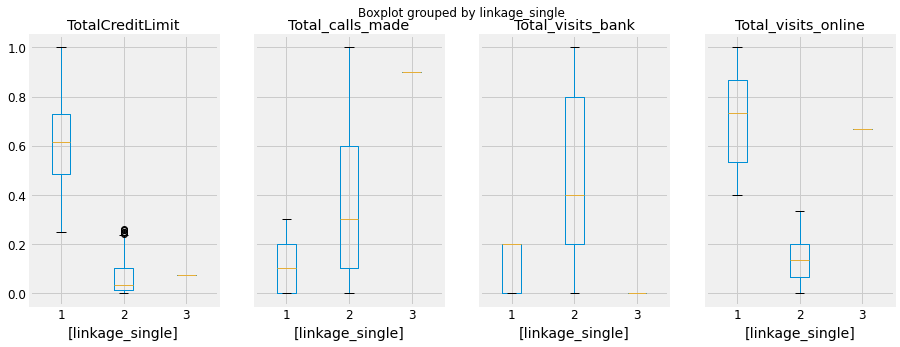

In [197]:
df.boxplot(by='linkage_single',layout = (1,4),figsize=(15,5));

<b>Cluster Analysis:</b>
- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, very less bank visits and highest online visits
- Cluster 2: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits
- Cluster 3: Customers with medium credit limit ,medium number of credit cards, Highest 0 bank visits and high online visits and highest calls to bank

Text(0.5, 0.92, '3D plot of Linkage - Complete')

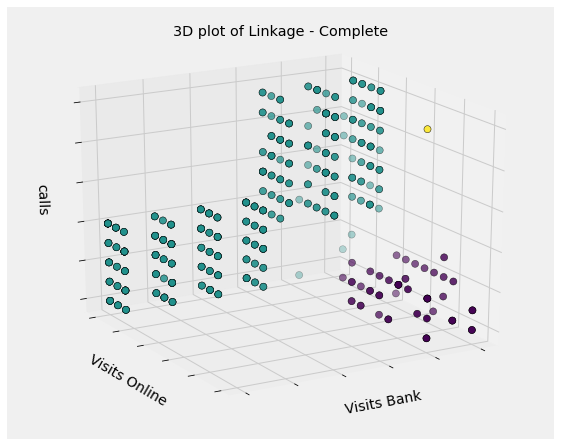

In [198]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = linkage_single
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k',s=50)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Visits Bank')
ax.set_ylabel('Visits Online')
ax.set_zlabel('calls')
ax.set_title('3D plot of Linkage - Complete')

In [199]:
df = df_final.copy()

In [200]:
score_value

[0.5291,
 0.7356,
 0.5321,
 0.5189,
 0.5291,
 0.5321,
 0.5311,
 0.5311,
 0.5315,
 0.8284,
 0.5321,
 0.7825,
 0.5189,
 0.7384,
 0.5291,
 0.6345,
 0.3196]

In [201]:
Allmodels = pd.DataFrame({"Model Name":model_name,"Score Type":score_name,"Score":score_value})
Allmodels.sort_values(['Score Type','Score',],ascending=[True,False])

,Model Name,Score Type,Score
9,Linkage_Avg,cophenetic correlation,0.8284
11,Linkage_Complete,cophenetic correlation,0.7825
13,Linkage_Ward,cophenetic correlation,0.7384
15,Linkage_single,cophenetic correlation,0.6345
1,PCA_KMeans_3,silhouettescore,0.7356
2,AgglomerativeClustering_3,silhouettescore,0.5321
5,Agg_linkage_avg_l2,silhouettescore,0.5321
10,Linkage_Avg,silhouettescore,0.5321
8,Agg_linkage_avg_cosine,silhouettescore,0.5315
6,Agg_linkage_avg_l1,silhouettescore,0.5311


<b>Observation</b>
- Linkage_Avg has highest CC of ~0.82 compared to other scipy linkage models
- wrt Silhouette scores -> Agg Clustering with euclidean and Avg, L2 with avg, Scipy Linkage Avg have same scores of 0.53
- KMeans on PCA reduced data has the highest Sil. Score of ~0.74 out performing other models
- Linkage Single (from sklearn or scipy) is the bad model because it has least CC and least SS

#### Compare K-means clusters with Hierarchical clusters

- Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
- In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
- K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
- K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram
- With a large number of variables, K-means compute faster 
- The result of K-means is unstructured, but that of hierarchal is more interpretable and informative
- It is easier to determine the number of clusters by hierarchical clustering’s dendrogram

<p><b>Compare KMeans with sklearn Agglomerative Clustering - Avg linkage</b></p>

- KMeans Sil. score is 0.529
- Agglomerative Clustering with Avg linkage Sil. Score is 0.532
- From the above analysis of clusters formed from each model, KMeans and Agglomerative clustering with Avg distance yielded very similar silhouette score.
- Also each cluster from each model (KMeans or Linkage models) have similar distributions of customers under each cluster except for Single linkage
- KMeans and Agg Clustering with Avg methods have similar customer distribution numbers in each cluster
- KMeans customer distributions - 382, 228, 50
- Agg Cluster with Avg linkage - 218,50,392

<b>AgglomerativeClustering_3 --- 218, 50, 392</b>
- Cluster 0: Customers with lower Total credit limit (fewer credit cards),more calls to bank, medium bank visits, medium online visits

- Cluster 1: It includes cutomers with higher Total credit limit (higher number of credit cards), fewer calls made to bank, less bank visits and highest online visits

- Cluster 2: Customers with medium credit limit (medium number of credit cards), few calls made, more bank visits and very less online visits

<b>KMeans_3 ---- 382, 228, 50 </b>
- Cluster 0: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
- Cluster 1: Customers with low credit limit, fewer credit cards, medium bank visits, medium online visits and highest calls to bank
- Cluster 2: It includes cutomers with highest Avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank

<p><b>Compare KMeans with Scipy Linkage with Avg distance</b></p>

<b>Linkage_Avg ------ 50, 218, 392 </b>
- Cluster 1: It includes cutomers with highest avg credit limit, highest number of credit cards, very less bank visits, highest online visits and fewer calls made to bank
- Cluster 2: Customers with low credit limit, fewer credit cards, medium bank visits, medium online visits and highest calls to bank
- Cluster 3: Customers with medium credit limit ,medium number of credit cards (~5,6), Highest average bank visits and very less online visits and medium calls to bank
</n>

- Linkage with average distance have a Cophentic corr of 0.82 outperforming other Scipy linkage models

- Cluster 2 of K-Means is similar to Cluster 1 of Scipy Linkage Avg: Customers in this cluster have high credit card limits (100K to avg 140K) and highest total number of credit cards (8-10). They have the lowest in person bank visits and highest online visits. They also have the lowest calls made. This cluster has fewer customers or around 50

- Cluster 1 of K-Means is similar to Cluster 2 of Scipy Linkage Avg: These are the customers with lowest credit card limits (min to avg 12K) and have the least number of credit cards (1-3). They also have lower in person visits to the bank and moderate online visits. However, they have the highest number of calls. This group has considerable number of customers, over 200.

- Cluster 0 of K-Means is similar to Cluster 3 of Scipy Linkage Avg: This is group of customers with moderate credit card limits (20K to avg ~34K) and have considerable number of credit cards (4-6). They have the highest in person bank visits and lowest online visits. Also, they have lower phone calls to the bank. This group has highest number of customers, over 380



#### Key Questions:

- How many different segments of customers are there?
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?

#### Answers:
- 3 distinct categories of customers based on credit limit and their mode of communication with bank

These segments mainly differ based on credit limits as below.

1) High Credit Limit preference of online bank

2) Medium Credit Limit preference of bank visits

3) Low Credit Limit preference of calling bank

Customers who have high credit limit seems to be high spenders with more number of credit cards and they prefer to bank online rather visiting the bank or calling bank

Customers who have low credit limit have less number of credit cards and have more calls made to the bank

Customers with medium credit limit have more credit cards when compared to low credit customers and have less calls made to bank as compared to low credit customers but have more visits to bank overall

<p>We can tailor contact methods to these customer preferences. Online/phone users will probably prefer email/text notifications, while in-person users mail prefer mail notifications and upselling (when at the bank location). Since online users tend to have (and presumably use) the most credit, these may be the demographic we want to target with our next ad campaign</p>

#### What are your recommendations to the bank on how to better market to and service these customers?

As we see there are three (3) categories/segments of customers with each segment having a preference for communication channel with bank, it is recommended that products are marketed to specific segment of customers through their preferred channel. Also, additional services can be provided based on how they connect with bank and also based on their spending pattern which can deduced from average credit limit.

- Customers with high credit limit tend to vist online. Hence they can be targeted for online campaigns, coupons and accordingly products and services can be offered to them
- Whereas customers with comparatively low credit limit make visits to bank more often, hence they can either be prompted with benefits of online banking or can be catered with in-bank offers/services and flyers
- Customers with low credit limits have less frequency on online platform, they can be marketed with benefits of online banking and/or make customer call center reps aware of promotions and offers so that they can target this segment of customers


Based on how bank wants to promote its products and services, a segment of customers can be targeted as we know their prefered mode of commmunication with bank